In [61]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import pandas_ta as ta
from scipy.stats import shapiro
import plotly.express as px
import seaborn as sns
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import plotly.graph_objects as go

import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()
sns.set_context("paper")

In [26]:
simbolo = "ES=F"

futuro = yf.Ticker(simbolo)
datos_historicos = futuro.history(start="2020-01-01", end="2024-03-09")
datos_historicos.index = pd.to_datetime(datos_historicos.index)
print(datos_historicos.tail())


                              Open     High      Low    Close   Volume  \
Date                                                                     
2024-03-04 00:00:00-05:00  5142.00  5157.75  5132.00  5138.25  1208040   
2024-03-05 00:00:00-05:00  5133.75  5135.50  5063.00  5085.75  1885769   
2024-03-06 00:00:00-05:00  5091.00  5134.50  5083.75  5111.75  1996223   
2024-03-07 00:00:00-05:00  5114.25  5170.50  5086.50  5161.75  1791666   
2024-03-08 00:00:00-05:00  5159.25  5193.00  5121.75  5129.00  2786680   

                           Dividends  Stock Splits  
Date                                                
2024-03-04 00:00:00-05:00        0.0           0.0  
2024-03-05 00:00:00-05:00        0.0           0.0  
2024-03-06 00:00:00-05:00        0.0           0.0  
2024-03-07 00:00:00-05:00        0.0           0.0  
2024-03-08 00:00:00-05:00        0.0           0.0  


In [30]:
datos_historicos.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03,1055.0,1055.0
mean,4013.208057,4045.985735,3979.187469,4015.197593,1.655404e+06,0.0,0.0
std,556.558927,549.931504,562.462394,555.610680,5.686609e+05,0.0,0.0
min,2220.250000,2386.000000,2174.000000,2220.500000,7.300900e+04,0.0,0.0
25%,3705.750000,3743.000000,3665.875000,3706.250000,1.302433e+06,0.0,0.0
50%,4122.750000,4157.750000,4091.500000,4123.000000,1.605196e+06,0.0,0.0
75%,4425.250000,4448.875000,4393.125000,4425.500000,1.925248e+06,0.0,0.0
max,5159.250000,5193.000000,5132.000000,5161.750000,5.715227e+06,0.0,0.0


In [57]:
datos_historicos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1055 entries, 2020-01-02 00:00:00-05:00 to 2024-03-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1055 non-null   float64
 1   High          1055 non-null   float64
 2   Low           1055 non-null   float64
 3   Close         1055 non-null   float64
 4   Volume        1055 non-null   int64  
 5   Dividends     1055 non-null   float64
 6   Stock Splits  1055 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 65.9 KB


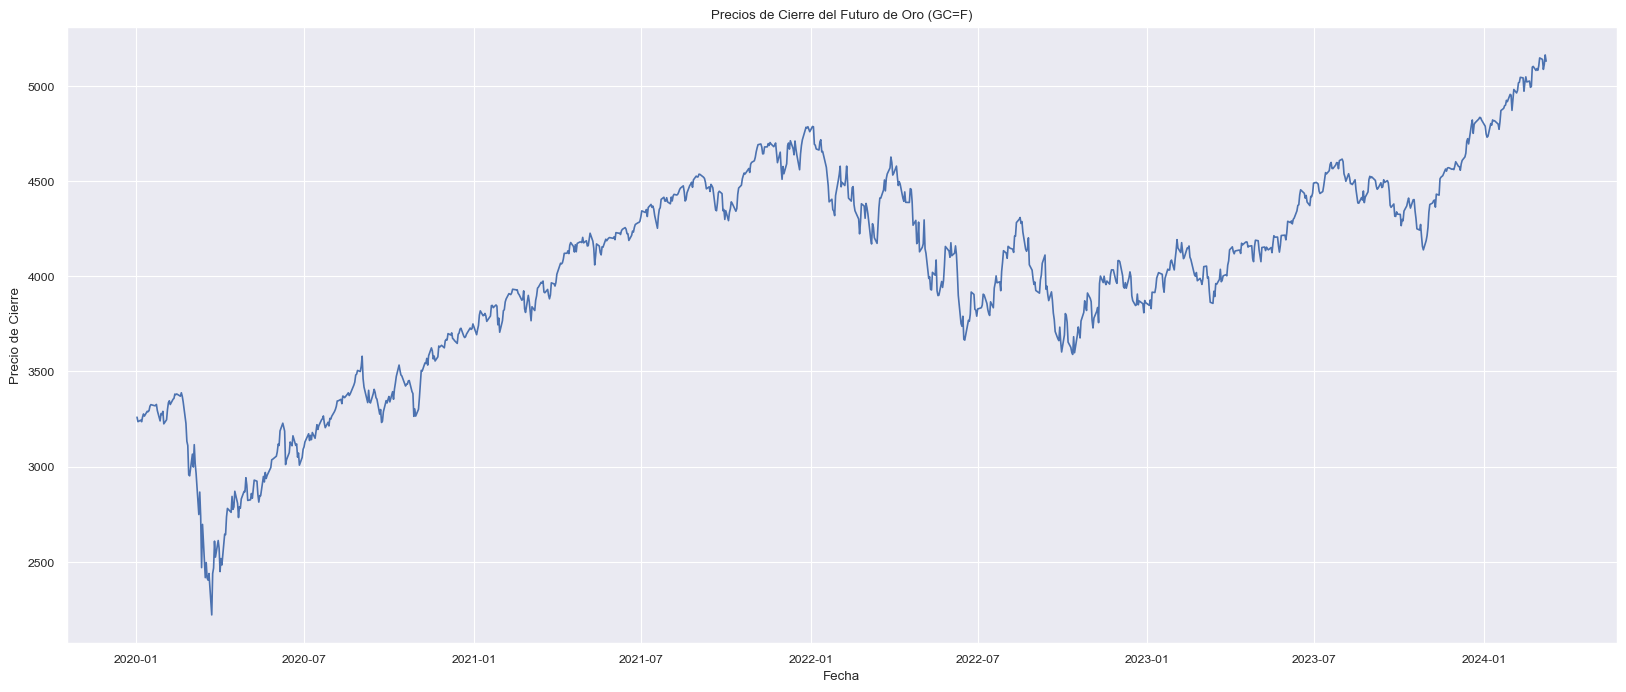

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(datos_historicos.index, datos_historicos['Close'])
plt.title('Precios de Cierre del Futuro de Oro (GC=F)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()

In [56]:
# Definir las fechas de inicio y fin de la pandemia
fecha_inicio_pandemia = "2020-03-01"
fecha_fin_pandemia = "2021-03-01"

# Crear una figura con candlesticks
fig = go.Figure(data=[go.Candlestick(x=datos_historicos.index,
                                     open=datos_historicos['Open'],
                                     high=datos_historicos['High'],
                                     low=datos_historicos['Low'],
                                     close=datos_historicos['Close'])])

# Agregar barras que indiquen el intervalo de la pandemia
fig.add_shape(type="rect",
              xref="x",
              yref="paper",
              x0=fecha_inicio_pandemia,
              y0=0,
              x1=fecha_fin_pandemia,
              y1=1,
              fillcolor="LightSalmon",
              opacity=0.5,
              layer="below",
              line_width=0)

# Configurar el diseño de la figura
fig.update_layout(
    title="S&P 500",
    xaxis_title="Day",
    yaxis_title="E-mini S&P 500",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
    xaxis_rangeslider_visible=False
)

# Mostrar la figura
fig.show()

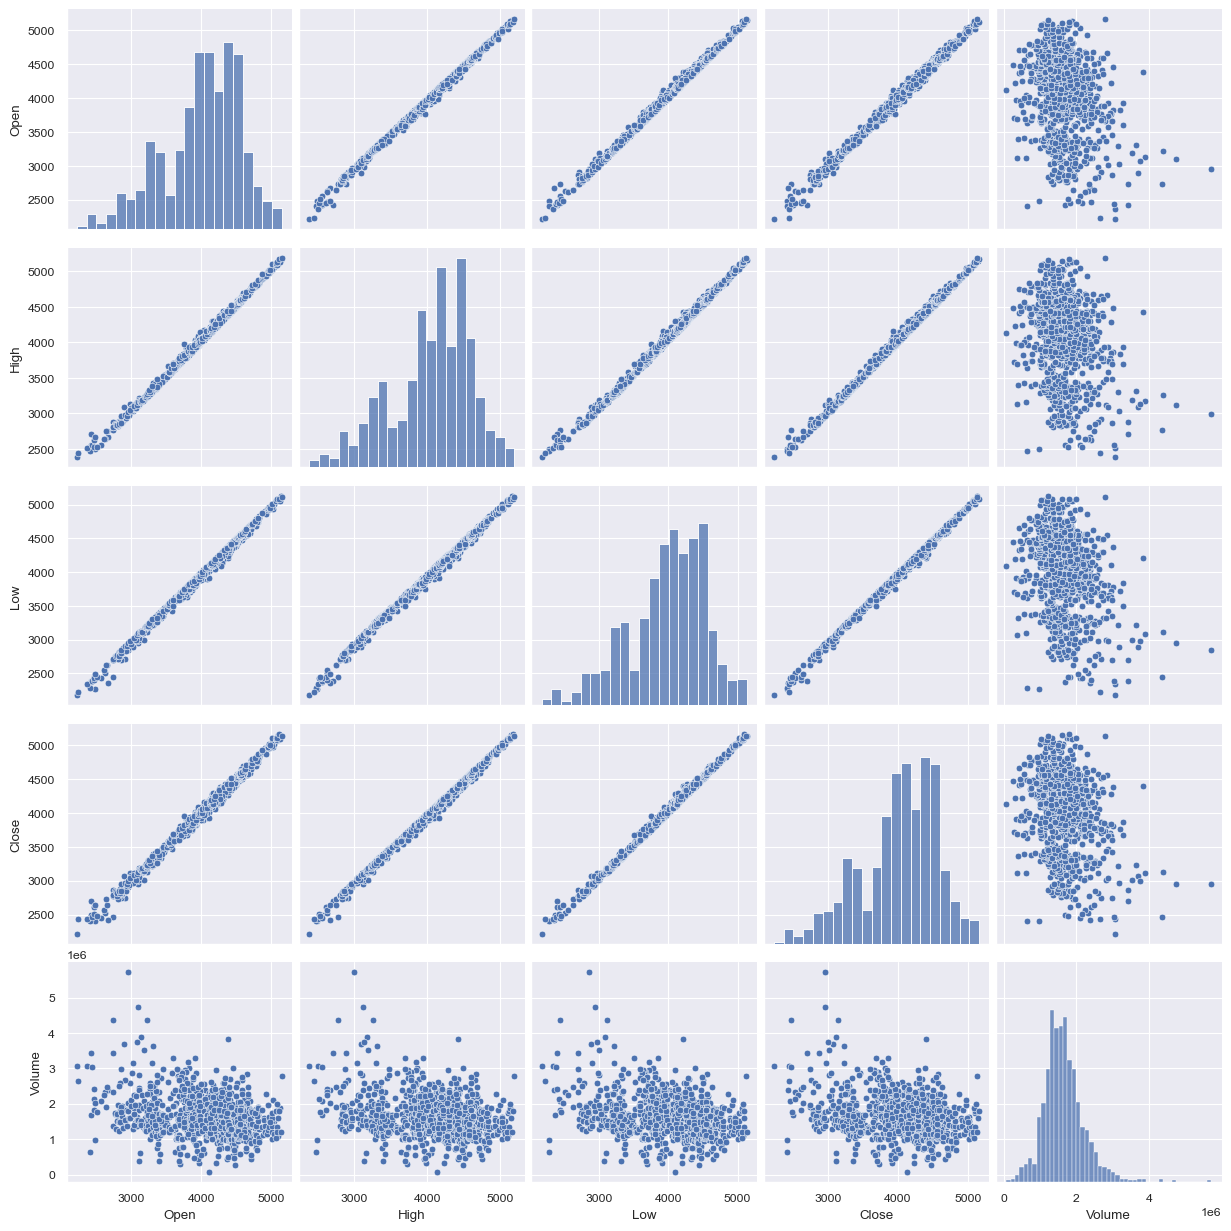

In [33]:
sns.pairplot(datos_historicos.drop(datos_historicos.columns[[5, 6]], axis=1)[1:])

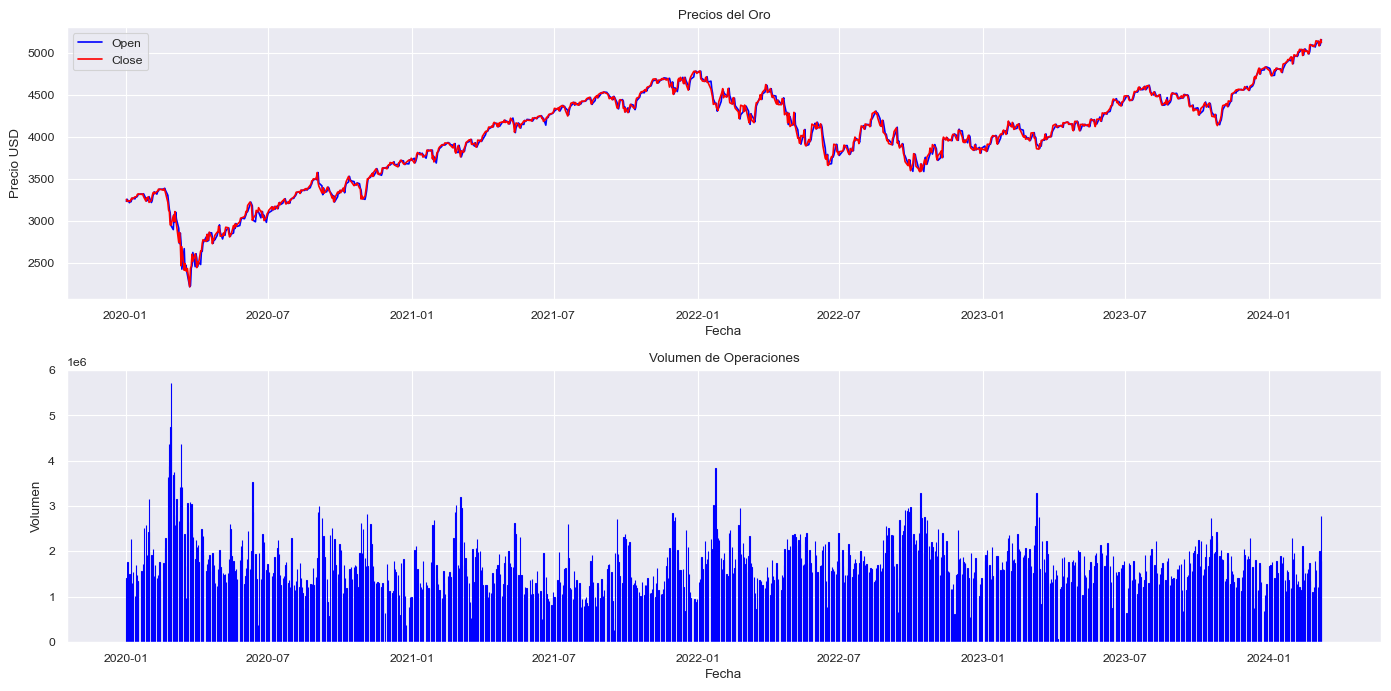

In [5]:
# Configuración de la figura para la visualización
plt.figure(figsize=(14, 7))

# Precios
plt.subplot(2, 1, 1)
plt.plot(datos_historicos.index, datos_historicos['Open'], label='Open', color='blue')
# plt.plot(datos_historicos.index, datos_historicos['High'], label='High', color='green')
# plt.plot(datos_historicos.index, datos_historicos['Low'], label='Low', color='red')
plt.plot(datos_historicos.index, datos_historicos['Close'], label='Close', color='red')
plt.title('Precios del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()

# Volumen
plt.subplot(2, 1, 2)
plt.bar(datos_historicos.index, datos_historicos['Volume'], edgecolor='blue', width=0.5)
plt.title('Volumen de Operaciones')
plt.xlabel('Fecha')
plt.ylabel('Volumen')

plt.tight_layout()
plt.show()

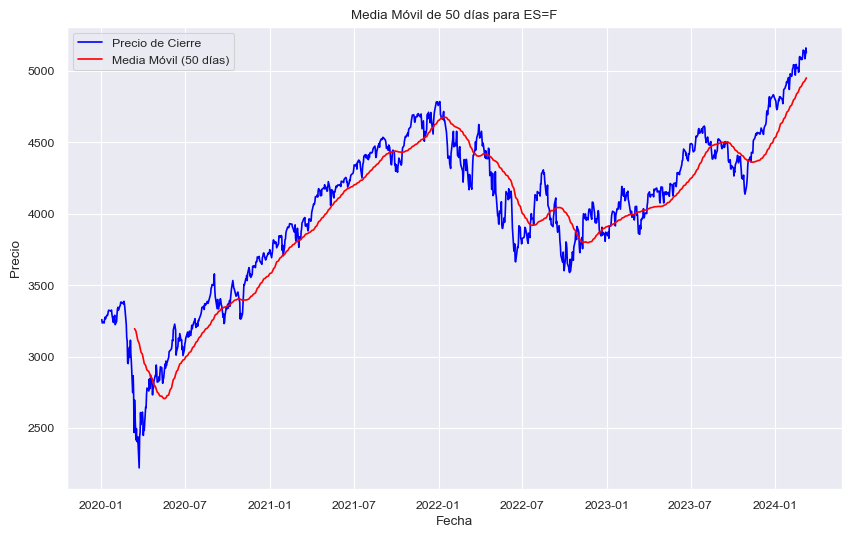

In [27]:
media_movil = datos_historicos['Close'].rolling(window=50).mean()

# Graficar los precios de cierre y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(datos_historicos.index, datos_historicos['Close'], label='Precio de Cierre', color='blue')
plt.plot(media_movil.index, media_movil, label='Media Móvil (50 días)', color='red')
plt.title('Media Móvil de 50 días para {}'.format(simbolo))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

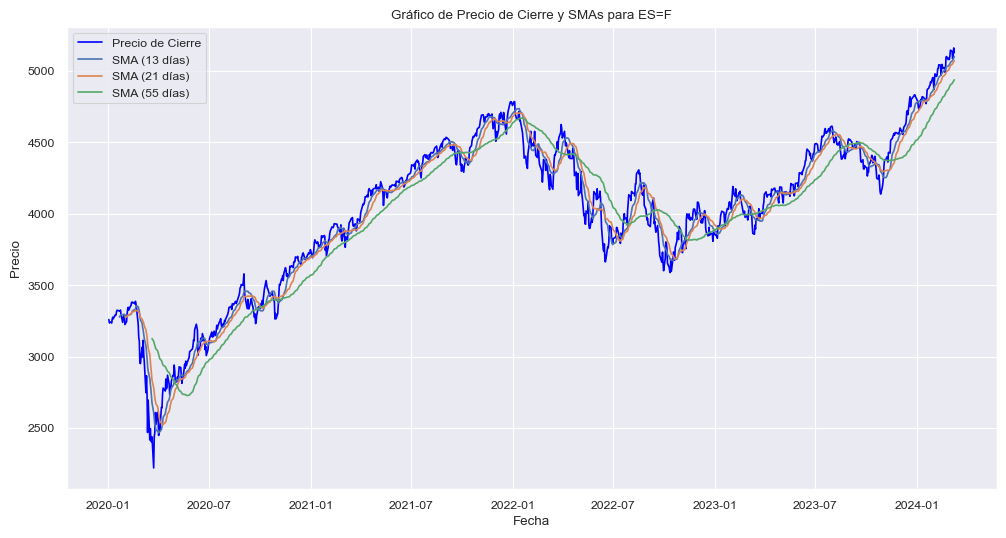

In [40]:
periodos = [13,21,55]
for periodo in periodos:
    datos_historicos['SMA_' + str(periodo)] = datos_historicos['Close'].rolling(window=periodo).mean()

# Graficar los precios de cierre y las SMAs
plt.figure(figsize=(12, 6))
plt.plot(datos_historicos.index, datos_historicos['Close'], label='Precio de Cierre', color='blue')

for periodo in periodos:
    plt.plot(datos_historicos.index, datos_historicos['SMA_' + str(periodo)], label='SMA ({} días)'.format(periodo))

plt.title('Gráfico de Precio de Cierre y SMAs para {}'.format(simbolo))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

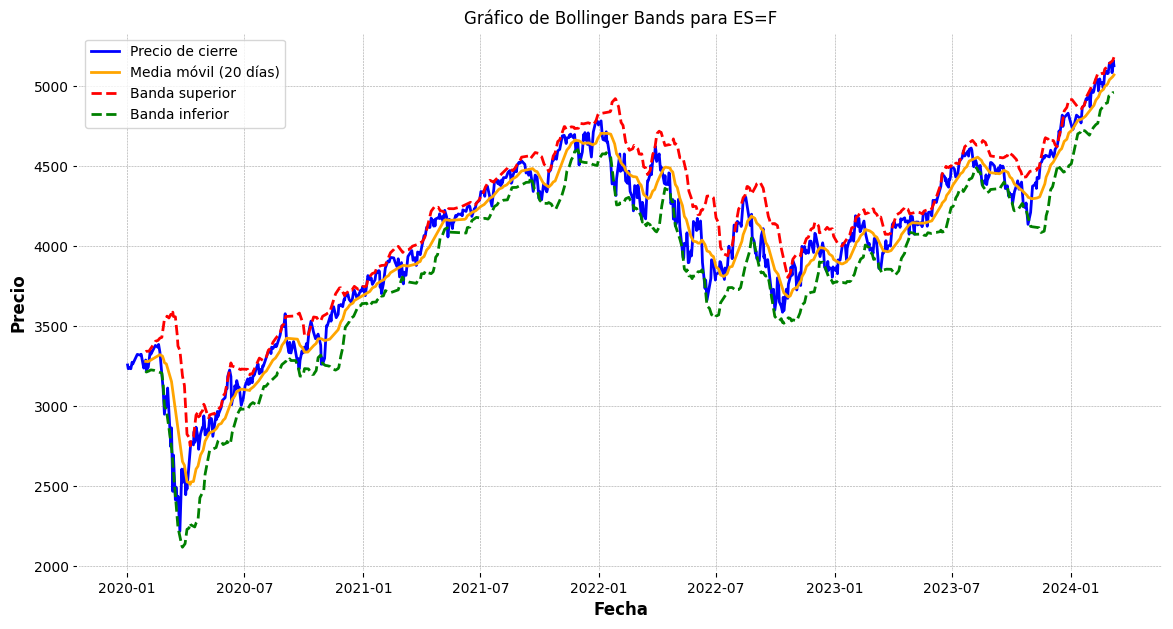

In [57]:
# Calcular las bandas de Bollinger
ventana = 20  # ventana de tiempo para el promedio móvil
datos_historicos['SMA'] = datos_historicos['Close'].rolling(window=ventana).mean()
datos_historicos['STD'] = datos_historicos['Close'].rolling(window=ventana).std()
datos_historicos['Upper'] = datos_historicos['SMA'] + (datos_historicos['STD'] * 2)
datos_historicos['Lower'] = datos_historicos['SMA'] - (datos_historicos['STD'] * 2)

# Crear la gráfica
plt.figure(figsize=(14,7))
plt.plot(datos_historicos['Close'], label='Precio de cierre', color='blue')
plt.plot(datos_historicos['SMA'], label='Media móvil (20 días)', color='orange')
plt.plot(datos_historicos['Upper'], label='Banda superior', color='red', linestyle='--')
plt.plot(datos_historicos['Lower'], label='Banda inferior', color='green', linestyle='--')

# Agregar detalles a la gráfica
plt.title('Gráfico de Bollinger Bands para {}'.format(simbolo))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
resultado = adfuller(datos_historicos['Close'])
print('Estadístico de prueba ADF: ', resultado[0])
print('Valor p: ', resultado[1])
print('Valores críticos:')
for key, valor in resultado[4].items():
    print(f'   {key}: {valor}')

Estadístico de prueba ADF:  -0.9983327072513138
Valor p:  0.7538719220496606
Valores críticos:
   1%: -3.4366231443991118
   5%: -2.864309749608104
   10%: -2.568244725395481


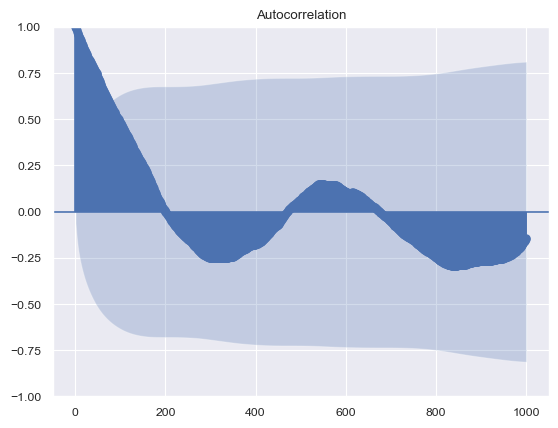

<Figure size 2000x800 with 0 Axes>

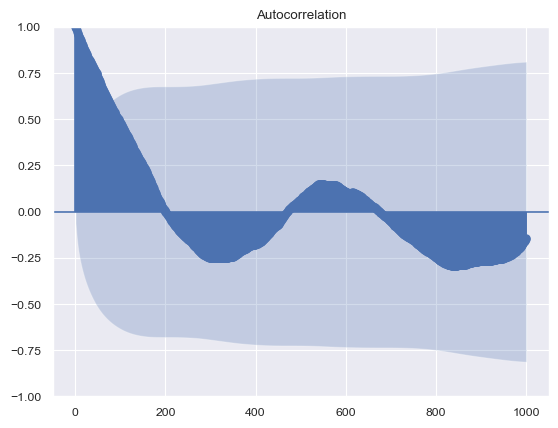

In [21]:
plt.figure(figsize=(20,8))
plot_acf(datos_historicos['Close'], lags=1000)

In [46]:
datos_historicos['Retornos'] = datos_historicos['Close'].pct_change()

stat, p = shapiro(datos_historicos['Retornos'].dropna())
print(f'Prueba de Shapiro-Wilk, Estadístico={stat}, p-valor={p}')

Prueba de Shapiro-Wilk, Estadístico=0.881238579750061, p-valor=1.2349502878403249e-27


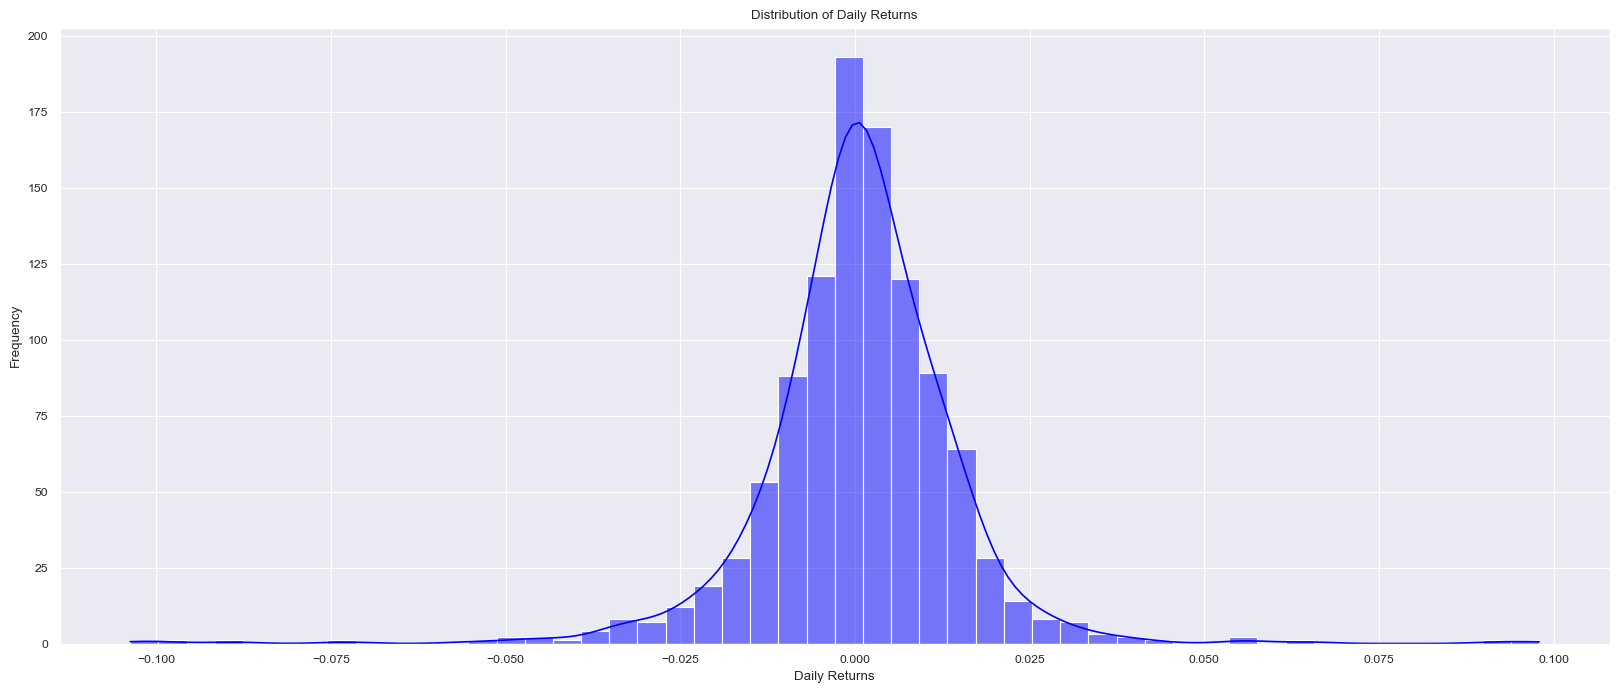

In [47]:
plt.figure(figsize=(20, 8))
sns.histplot(datos_historicos['Retornos'], kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

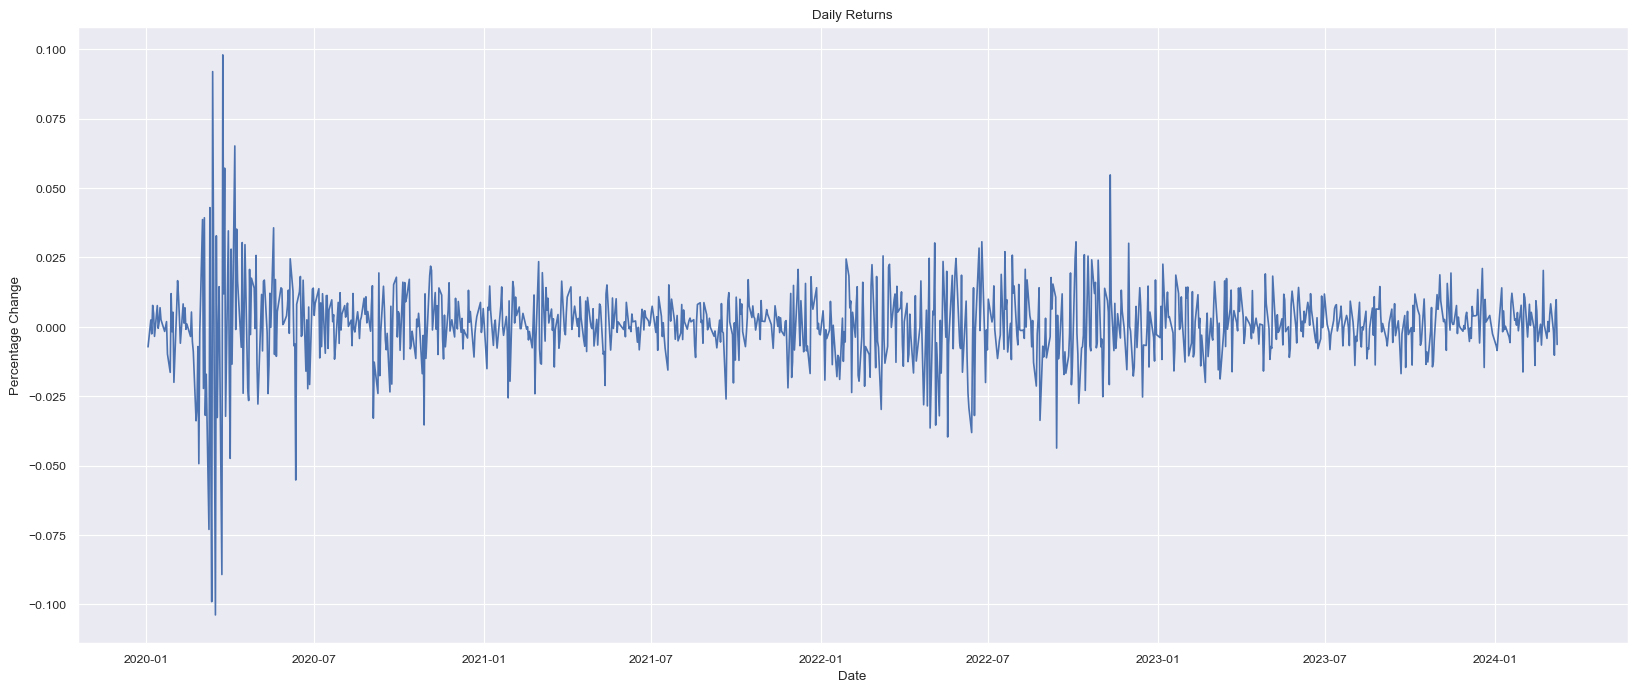

In [48]:
plt.figure(figsize=(20, 8))
plt.plot(datos_historicos['Retornos'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.show()